In [1]:
#import numpy as np
import pandas as pd

In [2]:
# data reading
df = pd.read_csv("collegePlace.csv")
df.shape

(2966, 8)

In [3]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [4]:
# head
# target : PlacedOrNot
 
df.head(5)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


## EDA

In [5]:
# null values check
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [6]:
# describe
df.describe(include = 'all')

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966,2966,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
unique,NaN,2,6,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,Computer Science,NaN,NaN,NaN,NaN,NaN
freq,NaN,2475,776,NaN,NaN,NaN,NaN,NaN
mean,21.485840,NaN,NaN,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,NaN,NaN,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,NaN,NaN,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,NaN,NaN,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,NaN,NaN,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,NaN,NaN,1.000000,8.000000,1.000000,0.000000,1.000000


C:\Users\rajes\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

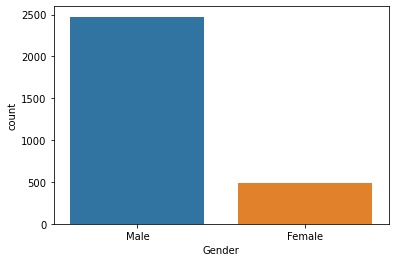

In [7]:
# gender distribution

import seaborn as sns

sns.countplot(df['Gender'])

In [8]:
df['Gender'].value_counts(normalize=True)

Male      0.834457
Female    0.165543
Name: Gender, dtype: float64

In [9]:
# list of columns

list(df)

['Age',
 'Gender',
 'Stream',
 'Internships',
 'CGPA',
 'Hostel',
 'HistoryOfBacklogs',
 'PlacedOrNot']

Gender


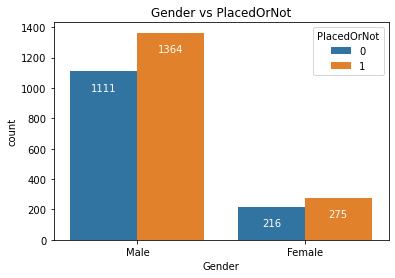

Stream


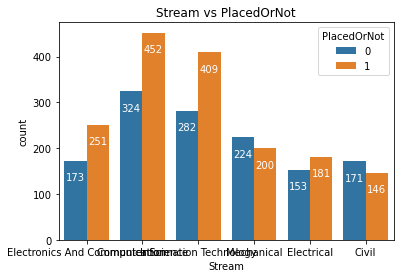

Internships


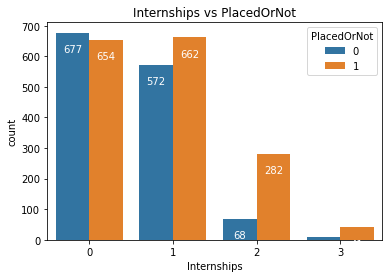

In [10]:
# catg columns vs target plots

import seaborn as sns
import matplotlib.pyplot as plt

def catg_eda(df, colname, target):
    print(colname)
    ax = sns.countplot(x=df[colname], hue = df[target], data=df)
    ax.set_title(colname + " vs " + target)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
    plt.show()

catg_cols = ['Gender', 'Stream','Internships']
target = 'PlacedOrNot'
for i, col_name in enumerate(catg_cols):
    catg_eda(df,col_name, target)

In [11]:
#top 3 streams with higher %placed

print(pd.crosstab(df.Stream, df.PlacedOrNot, margins = True, normalize = 'index')[1].sort_values(ascending=False)[0:3])
print(pd.crosstab(df.Stream, df.PlacedOrNot, margins = True, normalize = 'index')[1].sort_values()[0:3])

Stream
Electronics And Communication    0.591981
Information Technology           0.591896
Computer Science                 0.582474
Name: 1, dtype: float64
Stream
Civil         0.460568
Mechanical    0.471698
Electrical    0.541916
Name: 1, dtype: float64


In [12]:
# gender vs target

print(pd.crosstab(df.Gender, df.PlacedOrNot, margins = True, normalize = 'index')[1].sort_values(ascending=False)[0:1])

Gender
Female    0.560081
Name: 1, dtype: float64


In [13]:
# Inernships vs target

print(pd.crosstab(df.Internships, df.PlacedOrNot, margins = True,normalize = 'index')[1].sort_values(ascending=False))

Internships
2      0.805714
3      0.803922
All    0.552596
1      0.536467
0      0.491360
Name: 1, dtype: float64


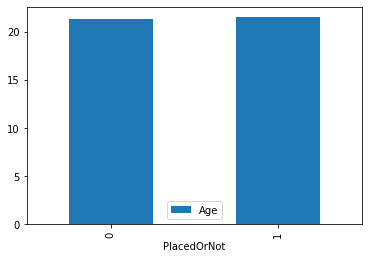

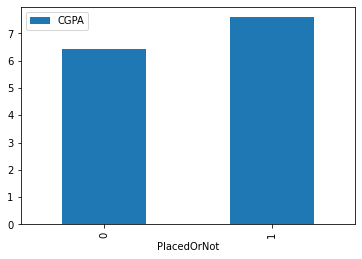

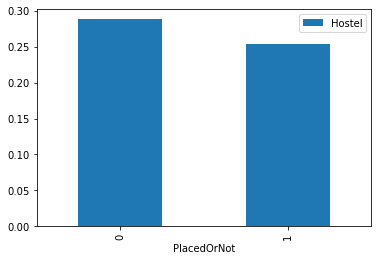

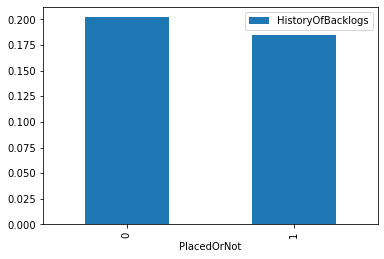

In [14]:
# numeric cols vs target plots

def num_eda(df, colname, target):
    df_temp = df.groupby(target)[colname].mean()
    df_temp = pd.DataFrame(df_temp, columns= [colname])
    df_temp.plot(kind= 'bar') 

num_cols = ['Age', 'CGPA', 'Hostel', 'HistoryOfBacklogs']
target = 'PlacedOrNot'
for i, col_name in enumerate(num_cols):
    num_eda(df,col_name, target)

## Model building_ Features selection

In [15]:
# T- tests to check the significant continuous variables
# Assumption: column varibales observations are normally distributed 
# If means of the classes are different, significant feature.

from scipy import stats

def t_test(df, cols):
    dep_cols_cont = []
    signi_level = 0.05
    
    for i in cols:
               
        s1 = df[df.PlacedOrNot == 0][i] 
        s2 = df[df.PlacedOrNot == 1][i]  
        result = stats.ttest_ind(s1, s2, equal_var=False)
        pvalue = result[1]/2
        print("============= column: ", i ,"==============")
        if pvalue < signi_level: 
            print('\n REJECT NULL ie s1 != s2 ie mean(PlacedOrNot: yes ) != mean(PlacedOrNot: No)\n')
            dep_cols_cont.append(i)
        else: 
            print("\n FAIL TO REJECT NULL ie s1 = s2 ie means are statistically not significantly different)\n")
    return dep_cols_cont

#data_train = pd.concat([X_train_org,y_train],axis=1)

signi_cols_cont = t_test(df,num_cols)

============= column:  Age ==============

 REJECT NULL ie s1 != s2 ie mean(PlacedOrNot: yes ) != mean(PlacedOrNot: No)

============= column:  CGPA ==============

 REJECT NULL ie s1 != s2 ie mean(PlacedOrNot: yes ) != mean(PlacedOrNot: No)

============= column:  Hostel ==============

 REJECT NULL ie s1 != s2 ie mean(PlacedOrNot: yes ) != mean(PlacedOrNot: No)

============= column:  HistoryOfBacklogs ==============

 FAIL TO REJECT NULL ie s1 = s2 ie means are statistically not significantly different)



In [16]:
# chi-square test to check the significant dicrete/categorical variables
# Assumption: column varibales observations are normally distributed 
# If p value significant, then feature is target is cosidered depenedent on feature.

from scipy.stats import chi2_contingency 

def chi_testing(table, col):
    dep_cols_disc = []
    # chisquare test and captruing the test outputs
    stat, p, dof, expected = chi2_contingency(table) 

    print('\n\t chisquare statistic:', stat)
    print('\n\t p value:', p)
    #print('\n\t degrees of freedom:', dof)
    #print('\n\t expected frequencies:', expected)

    # Assuming significance level (alpha) as 0.05.    
    signi_level = 0.05

    
    print("\n\tTest Result:")

    if p < signi_level: 
        print('\n\t REJECT NULL Hypothesis: Dependence siginficant \n')
        dep_cols_disc.append(col)
    else: 
        print('\n\t FAIL TO REJECT NULL Hypothesis: Dependence insignificant ie Independent\n')
    return dep_cols_disc

signi_cols_disc = []

for col in catg_cols:
    table = pd.crosstab(df[col], df['PlacedOrNot'])
    print("col name:",col)
    signi_col = chi_testing(table,col)
    signi_cols_disc.extend(signi_col)

col name: Gender

	 chisquare statistic: 0.0995364040812469

	 p value: 0.7523866780714197

	Test Result:

	 FAIL TO REJECT NULL Hypothesis: Dependence insignificant ie Independent

col name: Stream

	 chisquare statistic: 32.015704313444225

	 p value: 5.8988688092065085e-06

	Test Result:

	 REJECT NULL Hypothesis: Dependence siginficant 

col name: Internships

	 chisquare statistic: 125.21592051289477

	 p value: 5.806386159701441e-27

	Test Result:

	 REJECT NULL Hypothesis: Dependence siginficant 



In [17]:
# All significant variables:

signi_cols = signi_cols_disc + signi_cols_cont

signi_cols

['Stream', 'Internships', 'Age', 'CGPA', 'Hostel']

In [18]:
# one hot encoding for catg variables

data_one_hot = pd.get_dummies(df, columns=['Stream'], drop_first=True)
data_one_hot.head(5)

,Age,Gender,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical
0,22,Male,1,8,1,1,1,0,0,1,0,0
1,21,Female,0,7,1,1,1,1,0,0,0,0
2,22,Female,1,6,0,0,1,0,0,0,1,0
3,21,Male,0,8,0,1,1,0,0,0,1,0
4,22,Male,0,8,1,0,1,0,0,0,0,1


In [19]:
# X, y separation

X = data_one_hot.drop(['Gender','HistoryOfBacklogs','PlacedOrNot'], axis=1)
y = data_one_hot[['PlacedOrNot']]

print(X.shape, y.shape)

# train, test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85,test_size=0.15, random_state=100)
print ("X_train: ", X_train.shape)
print ("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print ("y_test: ", y_test.shape)

(2966, 9) (2966, 1)
X_train:  (2521, 9)
y_train:  (2521, 1)
X_test:  (445, 9)
y_test:  (445, 1)


## Models

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train,y_train)
print('Train score:',lr.score(X_train,y_train))

Train score: 0.7687425624752082


C:\Users\rajes\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\rajes\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
import pickle

with open("Pickle_file_Placement.pkl", 'wb') as file:
    pickle.dump(lr,file)


In [22]:
with open("Pickle_file_Placement.pkl", 'rb') as file:
    pickled_LogRegmodel= pickle.load(file)

In [23]:
Ypredict = pickled_LogRegmodel.predict(X_test)

In [24]:
Ypredict

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,

In [25]:
print('Test score:',lr.score(X_test,y_test))

Test score: 0.7325842696629213


In [27]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print('Train score:',dt.score(X_train,y_train))

Train score: 0.9071796905989686


In [28]:
import pickle

with open("Pickle_file_Placement_dt.pkl", 'wb') as file:
    pickle.dump(dt,file)
    
with open("Pickle_file_Placement_dt.pkl", 'rb') as file:
    pickled_dt_model= pickle.load(file)

In [29]:
Ypredict = pickled_dt_model.predict(X_test)
print('Test score:',dt.score(X_test,y_test))

Test score: 0.8674157303370786
